In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from scipy.stats import linregress
import matplotlib.pyplot as plt

In [5]:
# read in csv to conver to df
eq_data=pd.read_csv("../Resources/eq_data.csv")
eq_data

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2022-12-31T12:12:26.650Z,33.397500,-116.393333,3.880,4.14,mw,132.0,16.0,0.07391,0.190,...,2023-01-28T07:44:58.915Z,"16km N of Borrego Springs, CA",earthquake,0.10,0.380,NaN,6.0,reviewed,ci,ci
1,2022-12-31T11:41:09.460Z,34.355667,-116.921833,4.730,3.47,mw,121.0,25.0,0.07845,0.150,...,2023-01-26T07:49:51.327Z,"11km SSE of Lucerne Valley, CA",earthquake,0.09,0.410,NaN,4.0,reviewed,ci,ci
2,2022-12-22T02:22:50.250Z,37.620167,-122.025000,3.820,3.34,mw,141.0,16.0,NaN,0.160,...,2023-01-25T22:06:18.040Z,"3km N of Union City, CA",earthquake,0.10,0.170,NaN,3.0,reviewed,nc,nc
3,2022-12-20T15:30:01.280Z,40.565667,-123.976667,20.100,3.01,ml,37.0,46.0,0.07691,0.140,...,2023-01-02T19:22:16.040Z,"10km E of Hydesville, CA",earthquake,0.22,0.340,0.274,22.0,reviewed,nc,nc
4,2022-12-17T11:39:42.860Z,37.918167,-122.304000,5.480,3.57,mw,170.0,19.0,0.01598,0.150,...,2023-01-26T11:43:49.966Z,"1km ENE of El Cerrito, CA",earthquake,0.10,0.170,NaN,4.0,reviewed,nc,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,2000-01-06T21:38:10.940Z,38.844000,-122.825667,1.500,3.85,mw,56.0,31.0,0.04054,0.070,...,2016-12-31T04:05:30.360Z,"9 km WNW of Cobb, California",earthquake,0.13,0.430,NaN,5.0,reviewed,nc,nc
7445,2000-01-03T21:59:31.780Z,34.101000,-117.008000,2.269,3.49,ml,0.0,22.4,NaN,0.192,...,2016-04-02T04:01:25.781Z,"8km NNE of Yucaipa, CA",earthquake,NaN,0.122,NaN,221.0,reviewed,ci,ci
7446,2000-01-02T17:58:32.820Z,34.309000,-116.072000,0.801,3.14,ml,0.0,65.5,NaN,0.172,...,2016-04-02T00:47:38.523Z,"19km N of Twentynine Palms, CA",earthquake,NaN,0.252,NaN,178.0,reviewed,ci,ci
7447,2000-01-02T15:49:40.650Z,38.038333,-118.696000,-0.903,3.11,md,51.0,107.0,0.22520,0.060,...,2018-04-24T22:21:49.943Z,"31 km NW of Benton, California",earthquake,0.20,6.580,0.180,73.0,reviewed,nc,nc


In [6]:
#check the data type for the columns
eq_data.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [7]:
#change the time to DT format


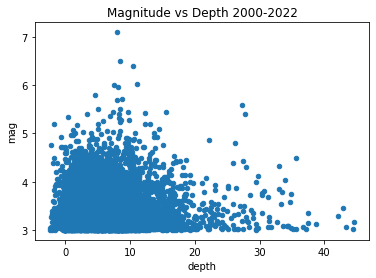

In [11]:
#scatterplot for all years
eq_data.plot.scatter(x='depth',
            y='mag')
plt.title('Magnitude vs Depth 2000-2022')
plt.show()

In [12]:
eq_data['mag'].max()

7.1

<AxesSubplot:xlabel='magNst', ylabel='mag'>

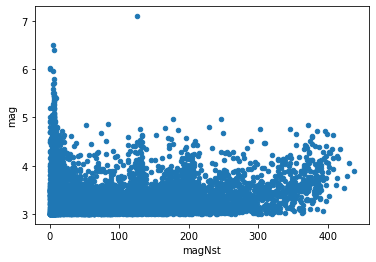

In [13]:
#scatterplot
eq_data.plot.scatter(x='magNst',
            y='mag')

In [14]:
df_converted_mag_by_year = eq_data.copy()
df_converted_mag_by_year['year'] = pd.to_datetime(df_converted_mag_by_year['time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.year
df_converted_mag_by_year

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year
0,2022-12-31T12:12:26.650Z,33.397500,-116.393333,3.880,4.14,mw,132.0,16.0,0.07391,0.190,...,"16km N of Borrego Springs, CA",earthquake,0.10,0.380,NaN,6.0,reviewed,ci,ci,2022
1,2022-12-31T11:41:09.460Z,34.355667,-116.921833,4.730,3.47,mw,121.0,25.0,0.07845,0.150,...,"11km SSE of Lucerne Valley, CA",earthquake,0.09,0.410,NaN,4.0,reviewed,ci,ci,2022
2,2022-12-22T02:22:50.250Z,37.620167,-122.025000,3.820,3.34,mw,141.0,16.0,NaN,0.160,...,"3km N of Union City, CA",earthquake,0.10,0.170,NaN,3.0,reviewed,nc,nc,2022
3,2022-12-20T15:30:01.280Z,40.565667,-123.976667,20.100,3.01,ml,37.0,46.0,0.07691,0.140,...,"10km E of Hydesville, CA",earthquake,0.22,0.340,0.274,22.0,reviewed,nc,nc,2022
4,2022-12-17T11:39:42.860Z,37.918167,-122.304000,5.480,3.57,mw,170.0,19.0,0.01598,0.150,...,"1km ENE of El Cerrito, CA",earthquake,0.10,0.170,NaN,4.0,reviewed,nc,nc,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7444,2000-01-06T21:38:10.940Z,38.844000,-122.825667,1.500,3.85,mw,56.0,31.0,0.04054,0.070,...,"9 km WNW of Cobb, California",earthquake,0.13,0.430,NaN,5.0,reviewed,nc,nc,2000
7445,2000-01-03T21:59:31.780Z,34.101000,-117.008000,2.269,3.49,ml,0.0,22.4,NaN,0.192,...,"8km NNE of Yucaipa, CA",earthquake,NaN,0.122,NaN,221.0,reviewed,ci,ci,2000
7446,2000-01-02T17:58:32.820Z,34.309000,-116.072000,0.801,3.14,ml,0.0,65.5,NaN,0.172,...,"19km N of Twentynine Palms, CA",earthquake,NaN,0.252,NaN,178.0,reviewed,ci,ci,2000
7447,2000-01-02T15:49:40.650Z,38.038333,-118.696000,-0.903,3.11,md,51.0,107.0,0.22520,0.060,...,"31 km NW of Benton, California",earthquake,0.20,6.580,0.180,73.0,reviewed,nc,nc,2000


In [36]:
df_2000=df_converted_mag_by_year.loc[(df_converted_mag_by_year.year ==2000)
                                     |(df_converted_mag_by_year.year ==2001)
                                     |(df_converted_mag_by_year.year ==2002)
                                     |(df_converted_mag_by_year.year ==2003)
                                     |(df_converted_mag_by_year.year ==2004)]
df_2005=df_converted_mag_by_year.loc[(df_converted_mag_by_year.year ==2005)
                                     |(df_converted_mag_by_year.year ==2006)
                                     |(df_converted_mag_by_year.year ==2007)
                                     |(df_converted_mag_by_year.year ==2008)
                                     |(df_converted_mag_by_year.year ==2009)]
df_2010=df_converted_mag_by_year.loc[(df_converted_mag_by_year.year ==2010)
                                     |(df_converted_mag_by_year.year ==2011)
                                     |(df_converted_mag_by_year.year ==2012)
                                     |(df_converted_mag_by_year.year ==2013)
                                     |(df_converted_mag_by_year.year ==2014)]
df_2015=df_converted_mag_by_year.loc[(df_converted_mag_by_year.year ==2015)
                                     |(df_converted_mag_by_year.year ==2016)
                                     |(df_converted_mag_by_year.year ==2017)
                                     |(df_converted_mag_by_year.year ==2018)
                                     |(df_converted_mag_by_year.year ==2019)]
df_2020=df_converted_mag_by_year.loc[(df_converted_mag_by_year.year ==2020)
                                     |(df_converted_mag_by_year.year ==2021)
                                     |(df_converted_mag_by_year.year ==2022)]
                            

    

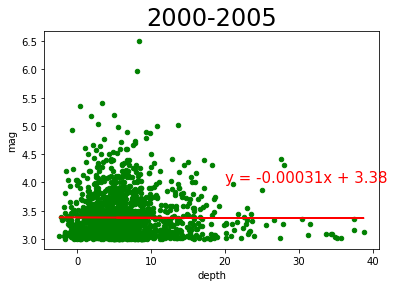

In [37]:
df_2000.plot.scatter(x='depth',
                     y='mag',c='green')
x_values = df_2000['depth'].astype('float')
y_values = df_2000['mag'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# create a written equation of the line
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))



plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,4),fontsize=15,color="red")

plt.title('2000-2005',fontsize=24)

plt.savefig('mag_depth_2000')

                   
                                     

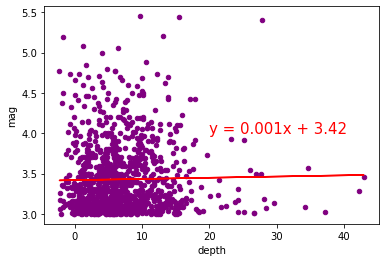

In [38]:
df_2005.plot.scatter(x='depth',
                     y='mag',c="purple")
x_values = df_2005['depth'].astype('float')
y_values = df_2005['mag'].astype('float')

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

# create a written equation of the line
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))


plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,4),fontsize=15,color="red")

plt.savefig('mag_depth_2005')  
                                 

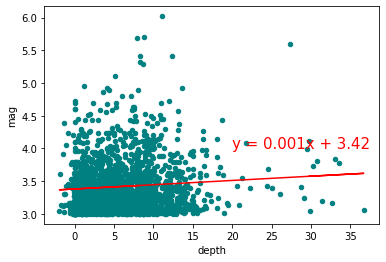

In [39]:
df_2010.plot.scatter(x='depth',
                     y='mag', c='teal')
x_values = df_2010['depth'].astype('float')
y_values = df_2010['mag'].astype('float')

# create a written equation of the line
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,4),fontsize=15,color="red")

plt.savefig('mag_depth_2010')
                                 

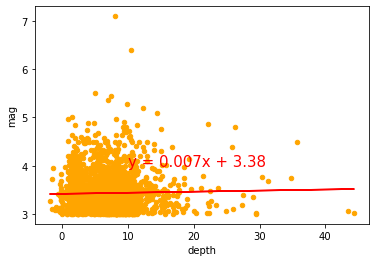

In [40]:
df_2015.plot.scatter(x='depth',
                     y='mag',color='orange')
x_values = df_2015['depth'].astype('float')
y_values = df_2015['mag'].astype('float')

# create a written equation of the line
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,4),fontsize=15,color="red")

plt.savefig('mag_depth_2015')
                                 

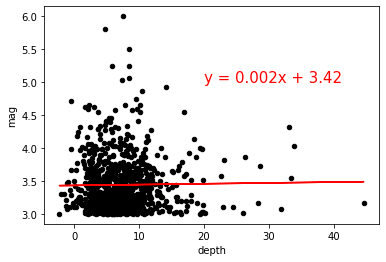

In [41]:
df_2020.plot.scatter(x='depth',
                     y='mag',color='black')
x_values = df_2020['depth'].astype('float')
y_values = df_2020['mag'].astype('float')

# create a written equation of the line
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,2))

#create a line of regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15,color="red")

plt.savefig('mag_depth_2020')